<div style="text-align: center;">

### EASTER 2025 SEMESTER  EXAMINATION 


FACULTY OF ENGINEERING, DESIGN AND TECHNOLOGY 

DEPARTMENT OF COMPUTING AND TECHNOLOGY 

MASTER OF INFORMATION TECHNOLOGY

YEAR 1 SEMESTER:  2

COURSE CODE:  DSC8204

COURSE NAME:  DATA ANALYSIS AND PROCESS MINING



</div>


<div style="text-align: left;">

#### Name: Ogabaniruhanga September

#### Access number: B30918

#### Registration Number: S24M10/006

</div>

In [ ]:
#installing and importing the libraries to read the dataset
# %pip install pandas
# %pip install openpyxl
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import random
from scipy import stats

## GOAL 1

The role of Information Technology in Ugandan Societal Discourse [30 Marks]

Context: Ugandan rural and urban societies play a key role in the overall discourse and policy implementation. Policymakers are considered as factors that facilitate policy change, and societies as the factors that implement it. The goal therefore, is to see if the two factors are having an impact using ICT tools like smartphones and computers.

1.Generate a pandas dataframe of 500 respondents with the following variables:

a.Respondent ID to represent the societal member or policymaker (datatype: integer or object)

b.Independent variables: Location (e.g. district, subcounty etc), Role (e.g. farmer, teacher, policymaker, etc), and 6 hypothetical queries on accessing information, ICT tools, and use of information and ICT tools (e.g. “You are well-versed with ICT tools”, etc).

c.Dependent variables: Hypothetical ordinal categorical data ranked as (0=Strongly Disagree, 1=Disagree, 2=Neutral, 3=Agree, 4=Strongly Agree)

2.Data transformation: Clean and transform the dataframe using suitable and justifiable tools.

3.Exploratory Data Analysis (EDA):

a.Visually display the data to highlight key insights on access and use of information and ICT tools by both society and policymakers.

b.Identify key variables that affect access and use of information and ICT tools.


### CREATE A PANDAS DATE FRAME 

In [ ]:
# Loading the JSON files into DataFrames
district = pd.read_json('districts.json')
counties = pd.read_json('counties.json')
subcounty = pd.read_json('subcounties.json')
parishes = pd.read_json('parishes.json')
villages = pd.read_json('villages.json')


 The JSON files containing the location data that are loaded into pandas DataFrames.

In [ ]:
#  Renaming the columns for consistency
district.rename(columns={'id': 'district_id'}, inplace=True)
counties.rename(columns={'district': 'district_id', 'id': 'county_id'}, inplace=True)
subcounty.rename(columns={'county': 'county_id', 'id': 'subcounty_id'}, inplace=True)
parishes.rename(columns={'subcounty': 'subcounty_id', 'id': 'parish_id'}, inplace=True)
villages.rename(columns={'parish': 'parish_id', 'id': 'village_id'}, inplace=True)

Renaming the columns in the DataFrames to ensure consistency across them to help when merging datasets.

In [ ]:
# Identifying the municipalities in the dataset
municipalities = district[district['name'].str.contains('Municipality', case=False, na=False)]

# Generating a list of municipalities based on names
municipality_names = municipalities['name'].unique().tolist()

Checking out for district names with the word 'Municipality' to help use classify districts as urban or rural assuming that the urban areas have a higher number of municipalities compared to the rural areas.

In [ ]:
# Merging DataFrames
merged = counties.merge(district, on='district_id', suffixes=('_county', '_district'))
final = merged.merge(subcounty, on='county_id', suffixes=('', '_subcounty'))
final_merged = final.merge(parishes, on='subcounty_id', suffixes=('', '_parish'))
final_dataset = final_merged.merge(villages, on='parish_id', suffixes=('', '_village'))

Merging the dataframes to create only one that includes all the geographical levels for easy access and distinguishing the columns from the dataframes. 

In [ ]:
# Assign Urban/Rural based on whether the District is in the list of municipalities
final_dataset['Urban/Rural'] = final_dataset['name_district'].apply(
    lambda x: 'Urban' if x in municipality_names else 'Rural'
)

In [ ]:
final_dataset.head()

,county_id,name_county,district_id,name_district,subcounty_id,name,parish_id,name_parish,village_id,name_village,Urban/Rural
0,242,LABWOR COUNTY,98,ABIM,1546,ABIM,9127,ABONGEPACH,57217,ABONGEPACH,Rural
1,242,LABWOR COUNTY,98,ABIM,1546,ABIM,9127,ABONGEPACH,58161,AMITA PRISON,Rural
2,242,LABWOR COUNTY,98,ABIM,1546,ABIM,9127,ABONGEPACH,58171,AMONICEK,Rural
3,242,LABWOR COUNTY,98,ABIM,1546,ABIM,9127,ABONGEPACH,58473,AREMBWOLA NORTH,Rural
4,242,LABWOR COUNTY,98,ABIM,1546,ABIM,9127,ABONGEPACH,58474,AREMBWOLA WEST,Rural


In [ ]:
# Renaming the location columns for clarity
final_dataset.rename(columns={
    'name_county': 'County',
    'name_district': 'District',
    'name': 'Subcounty',
    'name_parish': 'Parish',
    'name_village': 'Village'
}, inplace=True)


In [ ]:
# Select relevant columns
selected_cols = ['District', 'County', 'Subcounty', 'Parish', 'Village', 'Urban/Rural']
Uganda = final_dataset[selected_cols]
Uganda.head()

,District,County,Subcounty,Parish,Village,Urban/Rural
0,ABIM,LABWOR COUNTY,ABIM,ABONGEPACH,ABONGEPACH,Rural
1,ABIM,LABWOR COUNTY,ABIM,ABONGEPACH,AMITA PRISON,Rural
2,ABIM,LABWOR COUNTY,ABIM,ABONGEPACH,AMONICEK,Rural
3,ABIM,LABWOR COUNTY,ABIM,ABONGEPACH,AREMBWOLA NORTH,Rural
4,ABIM,LABWOR COUNTY,ABIM,ABONGEPACH,AREMBWOLA WEST,Rural


In [ ]:
# Generating unique Respondent IDs
respondent_ids = [f"R{str(i).zfill(3)}" for i in range(1, 501)]

In [ ]:
# Generating random individual data
roles = ['Farmer', 'Teacher', 'Policymaker', 'Data Analyst', 'Business Owner', 'Student']
first_names = ['John', 'Jane', 'Alex', 'Emily', 'Michael', 'Sarah', 'David', 'Laura', 
               'Robert', 'Linda', 'Chris', 'Jessica', 'Daniel', 'Sophia', 'James', 
               'Olivia', 'Matthew', 'Emma', 'Andrew', 'Isabella', 'Peter', 'Joshua', 'Malcom']
last_names = ['Smith', 'Johnson', 'Williams', 'Brown', 'Jones', 'Garcia', 'Miller', 
              'Davis', 'Rodriguez', 'Martinez', 'Hernandez', 'Lopez', 'Gonzalez', 
              'Wilson', 'Anderson', 'Thomas', 'Taylor', 'Moore', 'Jackson', 'Martin', 
              'Kate', 'Evelyne', 'Samson']

In [ ]:
# Generating 500 unique names and roles
names = random.sample([f"{fn} {ln}" for fn in first_names for ln in last_names], 500)
random_roles = random.choices(roles, k=500)

In [ ]:
# Randomly selecting 500 villages
random_villages = Uganda.sample(n=500).reset_index(drop=True)


In [ ]:
# Creating the DataFrame
individuals = pd.DataFrame({
    'Respondent ID': respondent_ids, 
    'Name': names,
    'Role': random_roles,
    'District': random_villages['District'],
    'County': random_villages['County'],
    'Subcounty': random_villages['Subcounty'],
    'Parish': random_villages['Parish'],
    'Village': random_villages['Village'],
    'Urban/Rural': random_villages['Urban/Rural']
})

Creating a dataframe to show the names, roles allocated and location. 

In [ ]:
# Display the first few rows
individuals.head()

,Respondent ID,Name,Role,District,County,Subcounty,Parish,Village,Urban/Rural
0,R001,Isabella Jackson,Teacher,ABIM,LABWOR COUNTY,ALEREK,OLEM,TYEN-CONGO,Rural
1,R002,Daniel Jackson,Business Owner,ALEBTONG,AJURI COUNTY,OMORO,BAROPIRO,AYILORO,Rural
2,R003,James Thomas,Farmer,KASESE,BUSONGORA COUNTY SOUTH,LAKE KATWE,KATUNGURU,KASUBI,Rural
3,R004,Jessica Johnson,Farmer,KANUNGU,KINKIZI COUNTY EAST,KAMBUGA,BUGONGI,KIGARAMA,Rural
4,R005,Sarah Moore,Policymaker,MAYUGE,BUNYA COUNTY WEST,MAGAMAGA TOWN COUNCIL,WABULUNGU WARD,BRIDGE,Rural


In [ ]:
# Hypothetical queries regarding ICT usage
queries = [
    "You are well-versed with ICT tools.",
    "You use smartphones for educational purposes.",
    "You access information online regularly.",
    "You find ICT tools helpful in your daily work.",
    "You believe that ICT can improve agricultural practices.",
    "You prefer online platforms for community discussions."
]

# Function to generate a realistic response based on role and Urban/Rural status
def generate_response(role, urban_rural):
    if role == 'Farmer':
        return random.randint(1, 2) if urban_rural == 'Rural' else random.randint(2, 4)
    elif role == 'Teacher':
        return random.randint(1, 3) if urban_rural == 'Rural' else random.randint(3, 4)
    elif role == 'Policymaker':
        return random.randint(2, 4)
    elif role == 'Data Analyst':
        return random.randint(2, 4) if urban_rural == 'Urban' else random.randint(1, 2)
    elif role == 'Business Owner':
        return random.randint(1, 3) if urban_rural == 'Rural' else random.randint(2, 4)
    elif role == 'Student':
        return random.randint(0, 3)
    return random.randint(0, 4)  # Default response

# Generate responses for each respondent based on their role and Urban/Rural status
for query in queries:
    individuals[query] = individuals.apply(lambda row: generate_response(row['Role'], row['Urban/Rural']), axis=1)
    
    # Display the first few rows of the final DataFrame
print(individuals.head())

  Respondent ID              Name            Role  District  \
0          R001  Isabella Jackson         Teacher      ABIM   
1          R002    Daniel Jackson  Business Owner  ALEBTONG   
2          R003      James Thomas          Farmer    KASESE   
3          R004   Jessica Johnson          Farmer   KANUNGU   
4          R005       Sarah Moore     Policymaker    MAYUGE   

                   County               Subcounty          Parish     Village  \
0           LABWOR COUNTY                  ALEREK            OLEM  TYEN-CONGO   
1            AJURI COUNTY                   OMORO        BAROPIRO     AYILORO   
2  BUSONGORA COUNTY SOUTH              LAKE KATWE       KATUNGURU      KASUBI   
3     KINKIZI COUNTY EAST                 KAMBUGA         BUGONGI    KIGARAMA   
4       BUNYA COUNTY WEST  MAGAMAGA  TOWN COUNCIL  WABULUNGU WARD      BRIDGE   

  Urban/Rural  You are well-versed with ICT tools.  \
0       Rural                                    2   
1       Rural             

Setting hypothetical questions about ICT that the individuals are to answer in the dataset then generating responsense to each query based on the individual's roles and whether they live in an urban or rural area.

In [ ]:
individuals

,Respondent ID,Name,Role,District,County,Subcounty,Parish,Village,Urban/Rural,You are well-versed with ICT tools.,You use smartphones for educational purposes.,You access information online regularly.,You find ICT tools helpful in your daily work.,You believe that ICT can improve agricultural practices.,You prefer online platforms for community discussions.
0,R001,Isabella Jackson,Teacher,ABIM,LABWOR COUNTY,ALEREK,OLEM,TYEN-CONGO,Rural,2,1,1,1,2,3
1,R002,Daniel Jackson,Business Owner,ALEBTONG,AJURI COUNTY,OMORO,BAROPIRO,AYILORO,Rural,3,3,2,2,3,3
2,R003,James Thomas,Farmer,KASESE,BUSONGORA COUNTY SOUTH,LAKE KATWE,KATUNGURU,KASUBI,Rural,2,1,1,1,1,1
3,R004,Jessica Johnson,Farmer,KANUNGU,KINKIZI COUNTY EAST,KAMBUGA,BUGONGI,KIGARAMA,Rural,2,1,2,1,2,2
4,R005,Sarah Moore,Policymaker,MAYUGE,BUNYA COUNTY WEST,MAGAMAGA TOWN COUNCIL,WABULUNGU WARD,BRIDGE,Rural,3,4,3,3,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,R496,Emma Hernandez,Student,NAMISINDWA,NAMISINDWA COUNTY,BUKOHO,BUKOHO,NAMUTOKHOLO II,Rural,0,2,3,1,1,1
496,R497,Michael Anderson,Policymaker,ARUA,AYIVU COUNTY,MANIBE,ELEKU,ONIVU,Rural,2,2,4,3,3,4
497,R498,Robert Kate,Student,LUUKA,LUUKA SOUTH COUNTY,BUKANGA,BUSALAMU,KIRINGO,Rural,0,2,2,1,0,0
498,R499,Alex Garcia,Data Analyst,KWEEN,KWEEN COUNTY,SUNDET,KUBOBEY,SOWUR,Rural,1,2,1,2,1,1


In [ ]:
# Check the column names of the dataframe
individuals.columns

Index(['Respondent ID', 'Name', 'Role', 'District', 'County', 'Subcounty',
       'Parish', 'Village', 'Urban/Rural',
       'You are well-versed with ICT tools.',
       'You use smartphones for educational purposes.',
       'You access information online regularly.',
       'You find ICT tools helpful in your daily work.',
       'You believe that ICT can improve agricultural practices.',
       'You prefer online platforms for community discussions.'],
      dtype='object')

In [ ]:
# Checking the shape of the dataframe
individuals.shape

(500, 15)

This shows that our dataframe has 500 rows and 15 columns

In [ ]:
# Check for duplicate rows
individuals.duplicated().sum()

np.int64(0)

This shows that the dataframe has no duplicate rows

In [ ]:
individuals.T

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
Respondent ID,R001,R002,R003,R004,R005,R006,R007,R008,R009,R010,...,R491,R492,R493,R494,R495,R496,R497,R498,R499,R500
Name,Isabella Jackson,Daniel Jackson,James Thomas,Jessica Johnson,Sarah Moore,James Taylor,Michael Gonzalez,Isabella Kate,Daniel Wilson,Jessica Taylor,...,John Lopez,Linda Johnson,Olivia Brown,Emma Gonzalez,Jessica Miller,Emma Hernandez,Michael Anderson,Robert Kate,Alex Garcia,Matthew Jackson
Role,Teacher,Business Owner,Farmer,Farmer,Policymaker,Student,Teacher,Business Owner,Business Owner,Policymaker,...,Business Owner,Policymaker,Student,Data Analyst,Farmer,Student,Policymaker,Student,Data Analyst,Teacher
District,ABIM,ALEBTONG,KASESE,KANUNGU,MAYUGE,SHEEMA,SOROTI,BUSHENYI,BUTEBO,KAKUMIRO,...,LWENGO,MUKONO,KYENJOJO,SHEEMA,KWANIA,NAMISINDWA,ARUA,LUUKA,KWEEN,NAMISINDWA
County,LABWOR COUNTY,AJURI COUNTY,BUSONGORA COUNTY SOUTH,KINKIZI COUNTY EAST,BUNYA COUNTY WEST,SHEEMA COUNTY SOUTH,DAKABELA COUNTY,IGARA COUNTY EAST,BUTEBO COUNTY,BUGANGAIZI EAST COUNTY,...,BUKOTO COUNTY MID-WEST,NAKIFUMA COUNTY,MWENGE COUNTY NORTH,SHEEMA COUNTY NORTH,KWANIA COUNTY,NAMISINDWA COUNTY,AYIVU COUNTY,LUUKA SOUTH COUNTY,KWEEN COUNTY,NAMISINDWA COUNTY
Subcounty,ALEREK,OMORO,LAKE KATWE,KAMBUGA,MAGAMAGA TOWN COUNCIL,RUGARAMA,TUBUR,KYEIZOOBA,BUTEBO,MWITANZIGE,...,NDAGWE,NAGOJJE,MABIRA TOWN COUNCIL,KIGARAMA,ADUKU TOWN COUNCIL,BUKOHO,MANIBE,BUKANGA,SUNDET,MAGALE TOWN COUNCIL
Parish,OLEM,BAROPIRO,KATUNGURU,BUGONGI,WABULUNGU WARD,RUGARAMA,ACHUNA,KITAGATA,ODIPANYA,KYABUSINGE,...,NANYWA,WAGGALA,MABIRA WARD,KYENGANDO,TEDUKA WARD,BUKOHO,ELEKU,BUSALAMU,KUBOBEY,BUKUTO WARD
Village,TYEN-CONGO,AYILORO,KASUBI,KIGARAMA,BRIDGE,MUGONDO,AKURE B,KAFUNJO,KALALAKA B,MITOOMA,...,KITABAAZI A,KITTO,KITWETWE A,RWENGIRI II,UCC ADUKU,NAMUTOKHOLO II,ONIVU,KIRINGO,SOWUR,BUKUTO
Urban/Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,...,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural,Rural
You are well-versed with ICT tools.,2,3,2,2,3,2,2,2,2,4,...,1,4,0,2,2,0,2,0,1,1


In [ ]:
# Save the individuals DataFrame to an Excel file
individuals.to_excel('individuals_data.xlsx', index=False)

In [ ]:
# Check for missing values
missing_values = individuals.isnull().sum()
print("\nMissing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Respondent ID                                               0
Name                                                        0
Role                                                        0
District                                                    0
County                                                      0
Subcounty                                                   0
Parish                                                      0
Village                                                     0
Urban/Rural                                                 0
You are well-versed with ICT tools.                         0
You use smartphones for educational purposes.               0
You access information online regularly.                    0
You find ICT tools helpful in your daily work.              0
You believe that ICT can improve agricultural practices.    0
You prefer online platforms for community discussions.      0
dtype: int64


All the columns have no missing values meaning the every individual has data in every field. 

In [ ]:
# Ensure data types are consistent
# Converting response columns to integers for clarity
response_columns = [
    "You are well-versed with ICT tools.",
    "You use smartphones for educational purposes.",
    "You access information online regularly.",
    "You find ICT tools helpful in your daily work.",
    "You believe that ICT can improve agricultural practices.",
    "You prefer online platforms for community discussions."
]
individuals[response_columns] = individuals[response_columns].astype(int)

In [ ]:
# Ensure data types are consistent (convert responses to integers)
for query in queries:
    individuals[query] = individuals[query].astype(int)

In [ ]:
# Generating summary statistics
summary_statistics = individuals[response_columns].describe()
print("\nSummary Statistics for Response Columns:")
print(summary_statistics)


Summary Statistics for Response Columns:
       You are well-versed with ICT tools.  \
count                           500.000000   
mean                              1.922000   
std                               0.930402   
min                               0.000000   
25%                               1.000000   
50%                               2.000000   
75%                               3.000000   
max                               4.000000   

       You use smartphones for educational purposes.  \
count                                     500.000000   
mean                                        1.928000   
std                                         0.912404   
min                                         0.000000   
25%                                         1.000000   
50%                                         2.000000   
75%                                         3.000000   
max                                         4.000000   

       You access information online r

This shows that for all of the enquires, there are 500 rows and respondents. They show that they have engaged and used ICT tools at a moderate level around 1.8 to 1.99 across various questions as according to the mean.

In [ ]:
# Count unique values in the Name column
individuals['Name'].nunique()

500

In [ ]:
# Count unique values in the Respondent ID column
individuals['Respondent ID'].nunique()

500

In [ ]:
# Check the data types of each column
print(individuals.dtypes)

Respondent ID                                               object
Name                                                        object
Role                                                        object
District                                                    object
County                                                      object
Subcounty                                                   object
Parish                                                      object
Village                                                     object
Urban/Rural                                                 object
You are well-versed with ICT tools.                          int64
You use smartphones for educational purposes.                int64
You access information online regularly.                     int64
You find ICT tools helpful in your daily work.               int64
You believe that ICT can improve agricultural practices.     int64
You prefer online platforms for community discussions.       i

3. Exploratory Data Analysis (EDA):

a. Visually display the data to highlight key insights on access and use of information and ICT tools by both society and policymakers.

b. Identify key variables that affect access and use of information and ICT tools.

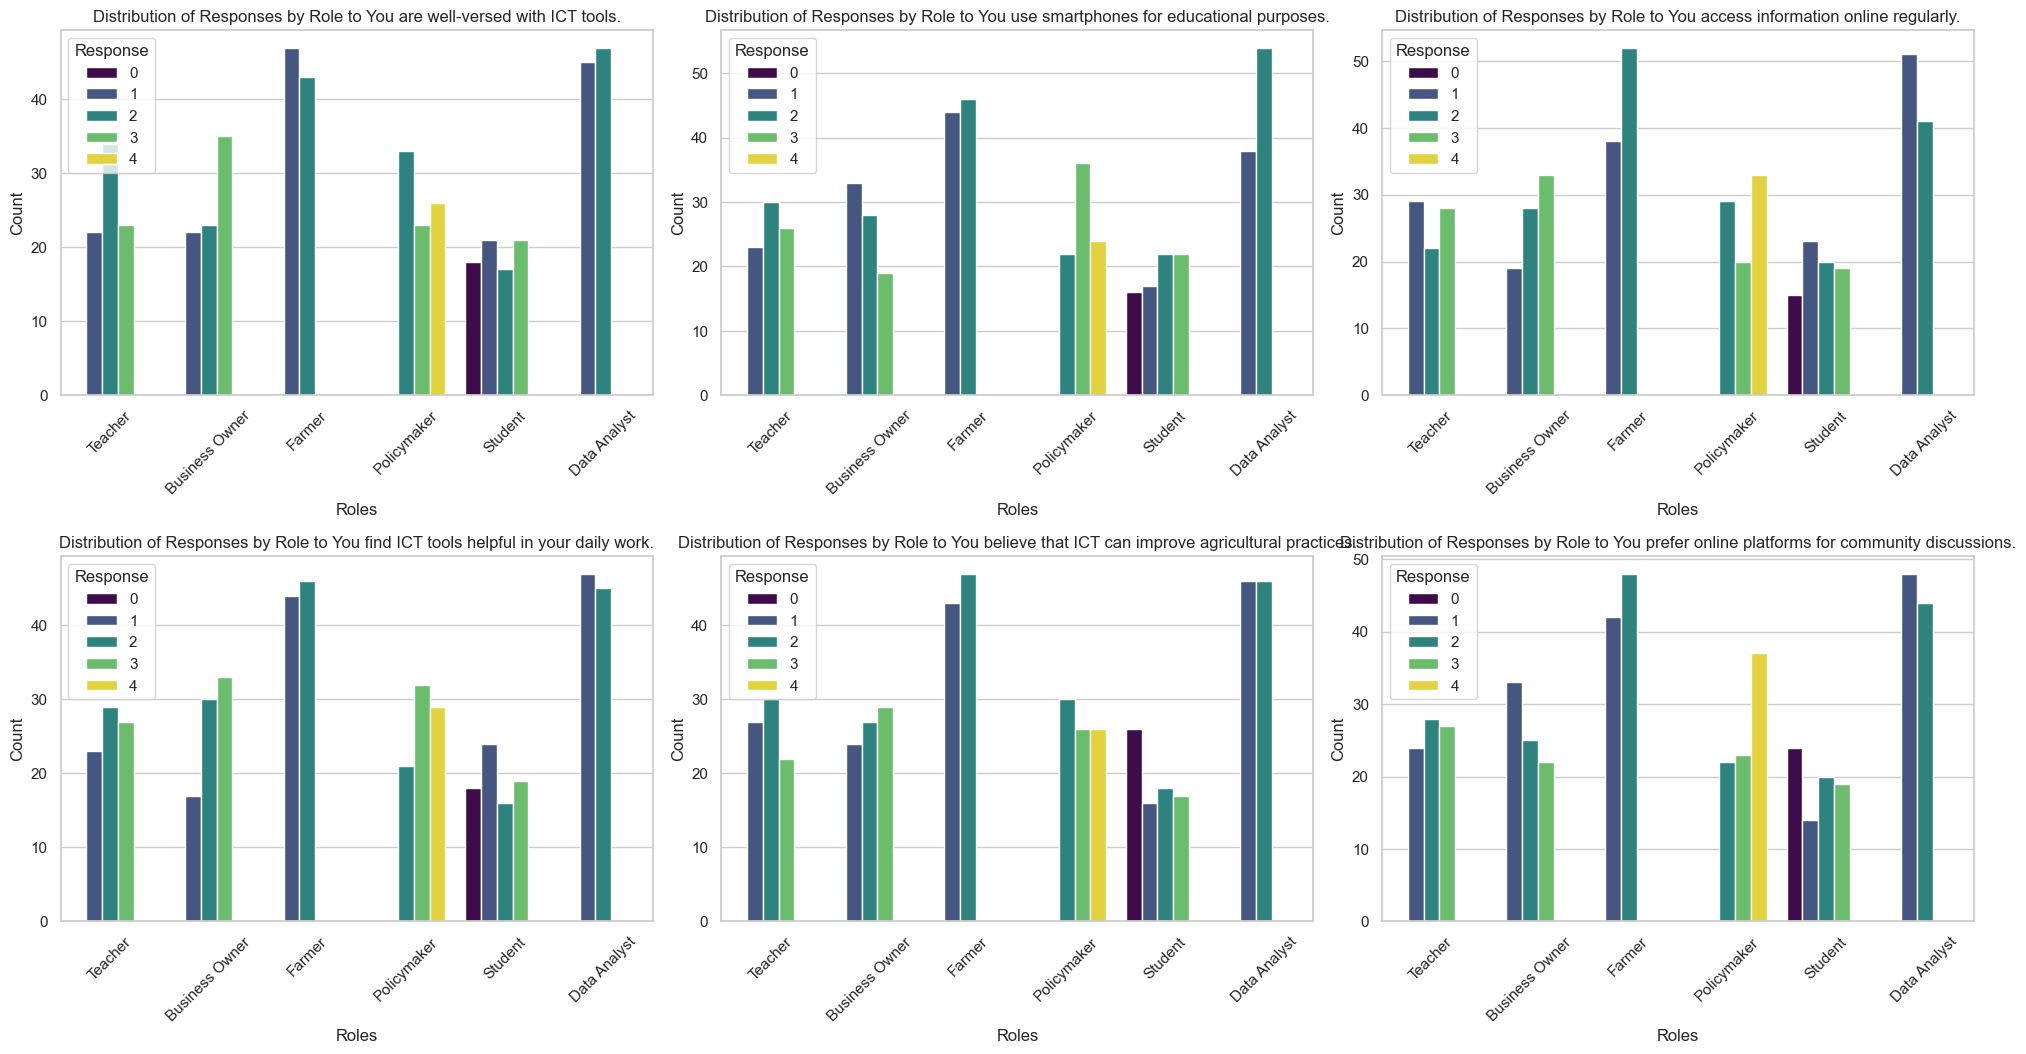

In [ ]:
# Set the style of seaborn
sns.set_theme(style="whitegrid")

# Visually display the data
# Set up the matplotlib figure
plt.figure(figsize=(20, 20))

# Distribution of Responses by Roles
melted_individuals = individuals.melt(id_vars=['Role'], value_vars=queries,
                                      var_name='Query', value_name='Response')

# Create subplots for each query
num_queries = len(queries)
for i, query in enumerate(queries):
    plt.subplot(4, 3, i + 1)  
    sns.countplot(data=melted_individuals[melted_individuals['Query'] == query], x='Role', hue='Response', palette='viridis')
    plt.title(f"Distribution of Responses by Role to {query}")
    plt.xlabel("Roles")
    plt.ylabel("Count")
    plt.xticks(rotation=45)


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

These graphs show each response pattern by each role like how some roles exhibit high engagements reflecting strong familiarity and usage due to their professional and educational environments, some display balanced responses but lean towards 3-4 suggesting effective use of ICT for decision making. Most respondents fall into the Neutral and disagree categories which is 2 and 1 with a notable number in Agree which is 3 which means uncertainty about proficiency and usage of ICT tools. 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12840\2700748685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=individuals, x=query, palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12840\2700748685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=individuals, x=query, palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12840\2700748685.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=individuals, x=query, palette='viridis')
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12840\2700748685.py:

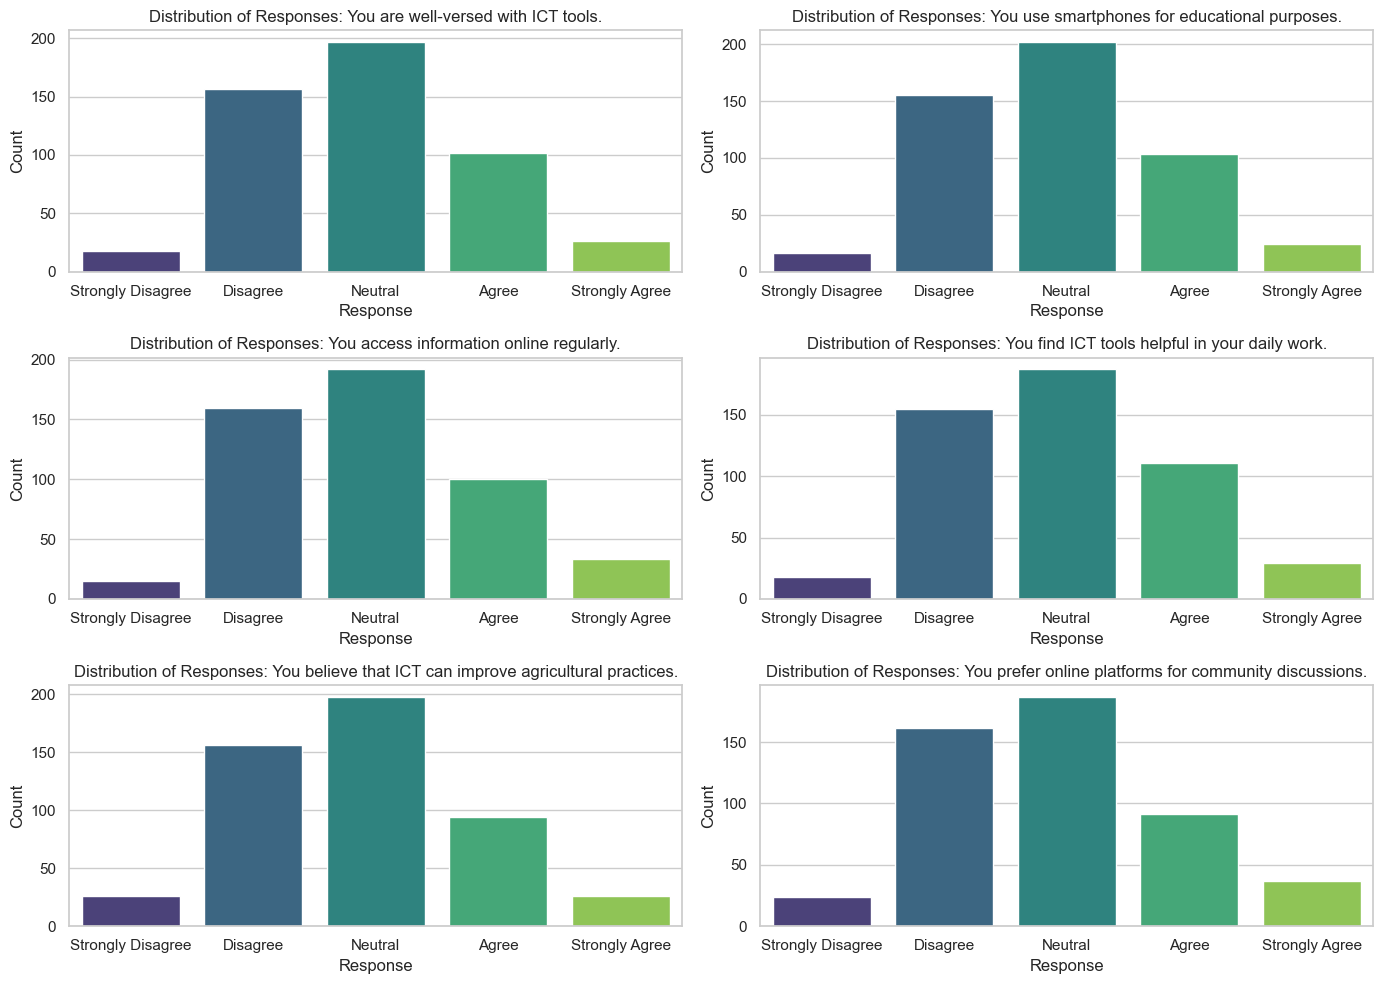

In [ ]:
# Distribution of Responses to Each Query
plt.figure(figsize=(14, 10))
for i, query in enumerate(queries):
    plt.subplot(3, 2, i + 1) 
    sns.countplot(data=individuals, x=query, palette='viridis')
    plt.title(f"Distribution of Responses: {query}")
    plt.xlabel("Response")
    plt.ylabel("Count")
    plt.xticks(ticks=[0, 1, 2, 3, 4], labels=["Strongly Disagree", "Disagree", "Neutral", "Agree", "Strongly Agree"])

plt.tight_layout()
plt.show()

Thes indiviadual plots show the distribution of responses to each specific query regarding ICT tool usage and most responses lie in neutral and disagree showing uncertainty among the respondents.

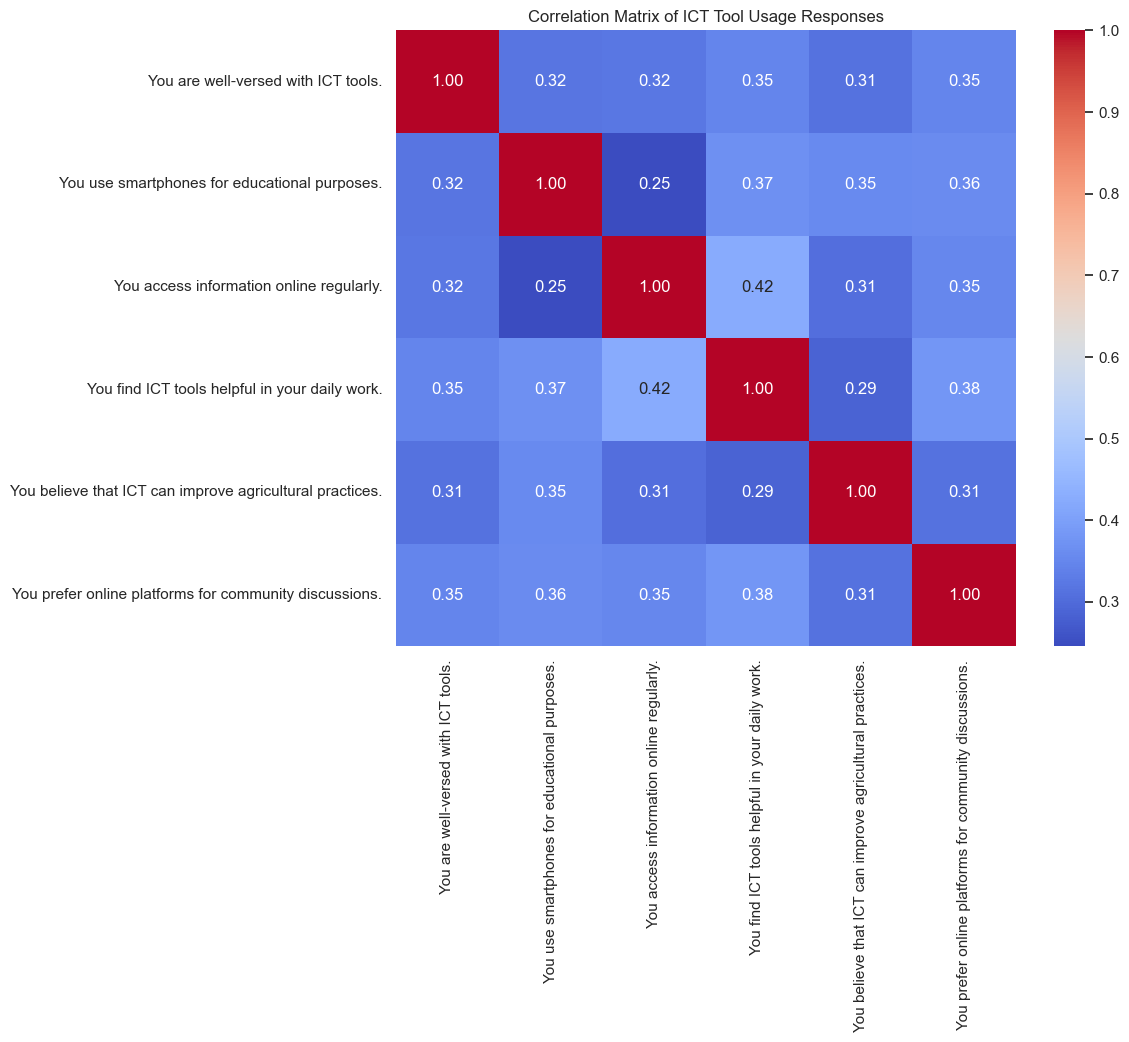

In [95]:
# Correlation matrix to find relationships between responses
correlation_matrix = individuals[queries].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of ICT Tool Usage Responses")
plt.show()

This correlation matrix graph displays the correlation coefficients between responses to different queries. There is a positive correlation between You are well-versed with ICT tools and the other queries showing that the respondents who feel confident in their ICT skills also recognize the use of utilizing these tools in their careers or education. 


In [96]:
from scipy import stats

# 2. ANOVA for Role Impact
f_values, p_values = [], []
for query in queries:
    groups = [individuals[query][individuals['Role'] == role] for role in individuals['Role'].unique()]
    f, p = stats.f_oneway(*groups)
    f_values.append(f)
    p_values.append(p)

role_impact = pd.DataFrame({'Query': queries, 'F-value': f_values, 'p-value': p_values})
print("Role Impact Analysis:\n", role_impact)

Role Impact Analysis:
                                                Query    F-value       p-value
0                You are well-versed with ICT tools.  43.037008  8.142091e-37
1      You use smartphones for educational purposes.  46.373057  2.818181e-39
2           You access information online regularly.  49.672816  1.171624e-41
3     You find ICT tools helpful in your daily work.  58.547110  8.127211e-48
4  You believe that ICT can improve agricultural ...  46.665088  1.726412e-39
5  You prefer online platforms for community disc...  57.555098  3.814574e-47


This analysis shows the highest F-values as you find ICT tools helpful in your daily work and when it comes to p-valuse, You are well-versed with ICT tools has the highest

<Figure size 640x480 with 0 Axes>

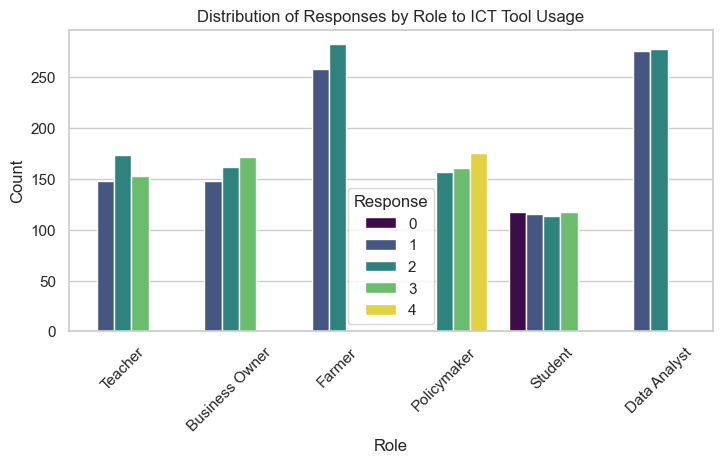

In [117]:
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Distribution of Responses by Role
melted_individuals = individuals.melt(id_vars=['Role'], value_vars=queries,
                                        var_name='Query', value_name='Response')

plt.subplot(2, 2, 1)
sns.countplot(data=melted_individuals, x='Role', hue='Response', palette='viridis')
plt.title("Distribution of Responses by Role to ICT Tool Usage")
plt.xlabel("Role")
plt.ylabel("Count")
plt.xticks(rotation=45)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

In [ ]:
# Importing necessary libraries for data manipulation and visualization
# Installing and importing the libraries to read the dataset
# %pip install pandas
# %pip install openpyxl
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore, shapiro, pearsonr, linregress, f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
# Set style for plots

import warnings 
%pip install scipy scikit-learn seaborn matplotlib

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)  # Set default figure size

Note: you may need to restart the kernel to use updated packages.


### GOAL 4

#### Prediction of Heart Arrhythmia in the Health Sector [30 Marks]

Context: Diagnosis of a heart arrhythmia involves measuring the heart activity for irregular heart beat using Electrocardiogram (ECG) and then  analysing the recorded data. However, there are challenges in identifying arrhythmias due to the high number of parameters (i.e. > 270) involved in the tests. These parameters can lead to false diagnosis. Therefore, it is important to identify the key parameters using suitable statistical tests, which in turn helps clinical staff accurately identify arrhythmias. 

#### 1. Data Collection and Preprocessing:

a. Data Source: You are provided with a dataset “arrhythmia-

1.data.csv” which contains medical data and a text file that contains the variable descriptions (“arrhythmia.names.txt”)

b. Preprocess the dataset for further analyses.

#### 2. Exploratory Data Analysis:

a. Explain the distribution of the variables and whether they deviate far from the expected normal ranges of a heart experiencing arrhythmia

b. Analyse the Heart rate distributions across the Sex and the Age of the patients.

#### 3. Features Importance Analysis:

a. Use suitable statistical analyses to pinpoint the most relevant variables affecting the Heart rate. 

b. The QRS is an important indicator of a normal heart, and several types of arrhythmia (e.g . Sinus tachycardia). Use peer-reviewed academic resources and suitable statistical tools to classify the patients within the dataset (i.e. highlight patients with arrhythmias)

In [ ]:
# Load the dataset from a CSV file
arr = pd.read_csv('arrhythmia-1.data.csv', na_values=['?'])

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(arr.head())

# Show dataset shape and summary
print(f"\nDataset shape: {arr.shape}")
print("\nData Summary:")
print(arr.info())

First few rows of the dataset:
   Age  Sex  Height  Weight  QRS Duration  P-R interval  Q-T interval  \
0   75    0     190      80            91           193           371   
1   56    1     165      64            81           174           401   
2   54    0     172      95           138           163           386   
3   55    0     175      94           100           202           380   
4   75    0     190      80            88           181           360   

   T interval  P interval  QRS     T     P  QRST     J  Heart rate  
0         174         121  -16  13.0  64.0  -2.0   NaN        63.0  
1         149          39   25  37.0 -17.0  31.0   NaN        53.0  
2         185         102   96  34.0  70.0  66.0  23.0        75.0  
3         179         143   28  11.0  -5.0  20.0   NaN        71.0  
4         177         103  -16  13.0  61.0   3.0   NaN         NaN  

Dataset shape: (452, 15)

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Dat

This prints out the first few rows, shape and summary of the dataset. The dataset has 452 entries with 452 rows and 15 columns, it shows 10 integer columns like Age, sex, height, weight and others because they show int64 and 5 float columns like T interval, P, J, Heart rate and QRST indicating that they may contain decimal values. 

In [ ]:
# Check the column names of the DataFrame
arr.columns

Index(['Age', 'Sex', 'Height', 'Weight', 'QRS Duration', 'P-R interval',
       'Q-T interval', 'T interval', 'P interval', 'QRS', 'T', 'P', 'QRST',
       'J', 'Heart rate'],
      dtype='object')

In [ ]:
# Check the index of the Dataframe
arr.index

RangeIndex(start=0, stop=452, step=1)

In [ ]:
# Check for missing values in each column and identify the columns
print(f"\nVariables with missing values:\n{arr.columns[arr.isna().any()]}")
print(f"\nMissing values per column:\n{arr.isna().sum()}\n")


Variables with missing values:
Index(['T', 'P', 'QRST', 'J', 'Heart rate'], dtype='object')

Missing values per column:
Age               0
Sex               0
Height            0
Weight            0
QRS Duration      0
P-R interval      0
Q-T interval      0
T interval        0
P interval        0
QRS               0
T                 8
P                22
QRST              1
J               376
Heart rate        1
dtype: int64



This shows the summary of the missing values and the columns with the missing vales like T, P, QRST, J and Heart rate. Though some of the columns are complete since they show 0, a few have missing entries like T with 8 missing values, P with 22 missing values, QRST with 1 missing value, J with 376 missing values and Heart rate with 1 missing value. 

In [ ]:
# Check for duplicate rows in the dataset
duplicates = arr.duplicated().sum()
print(f"\n\nThere are {duplicates} duplicate values.\n" if duplicates else "\n\nThere are no duplicates.\n")



There are no duplicates.



In [ ]:
# Remove impossible values for Height and Weight
arr = arr[(arr['Height'] > 100) & (arr['Height'] < 250)]
arr = arr[(arr['Weight'] > 30) & (arr['Weight'] < 200)]

# Convert 'Heart rate' to numeric, coercing errors to NaN
arr['Heart rate'] = pd.to_numeric(arr['Heart rate'], errors='coerce')

# Drop rows with NaN values in 'Heart rate'
arr.dropna(subset=['Heart rate'], inplace=True)

# Replace '?' with NaN and convert other columns to numeric types
arr.replace('?', np.nan, inplace=True)
arr = arr.apply(pd.to_numeric, errors='coerce')

# Handle missing values for critical columns with median
critical_cols = ['QRS Duration', 'P-R interval', 'Q-T interval', 'Heart rate']
for col in critical_cols:
    arr[col].fillna(arr[col].median(), inplace=True)

# Handle remaining missing values
arr.fillna(arr.median(), inplace=True)

# Check unique values in the 'Sex' column
print("\nUnique values in 'Sex' column before mapping:")
print(arr['Sex'].unique())

# Convert 'Sex' to categorical (0 for Male, 1 for Female)
# Assuming the 'Sex' column contains 'Male' and 'Female' strings
arr['Sex'] = arr['Sex'].replace({'Male': 0, 'Female': 1})

# Check unique values after mapping
print("\nUnique values in 'Sex' column after mapping:")
print(arr['Sex'].unique())


Unique values in 'Sex' column before mapping:
[0 1]

Unique values in 'Sex' column after mapping:
[0 1]


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14200\1811554019.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  arr[col].fillna(arr[col].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_14200\1811554019.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

This removes the implausible height and weight values, maps the Sex column from numerical to categorical values, converts the Heart rate column to numeric and replaces ? with NaN converting columns to numeric types also filling any remaining NaN values with the median

In [ ]:
arr.shape

(437, 15)

The dataset has 437 rows and 15 columns

In [ ]:
# Save the cleaned dataset
arr.to_csv('cleaned_arr.csv', index=False)

The cleaned dataset is saved to a new CSV file.

In [ ]:
# Check for missing values after handling
print("\nMissing values after handling:")
print(arr.isnull().sum())


Missing values after handling:
Age             0
Sex             0
Height          0
Weight          0
QRS Duration    0
P-R interval    0
Q-T interval    0
T interval      0
P interval      0
QRS             0
T               0
P               0
QRST            0
J               0
Heart rate      0
dtype: int64


This step checks and prints the count of any remaining missing values after cleaning. It shows that there are no missing values in any of the columns

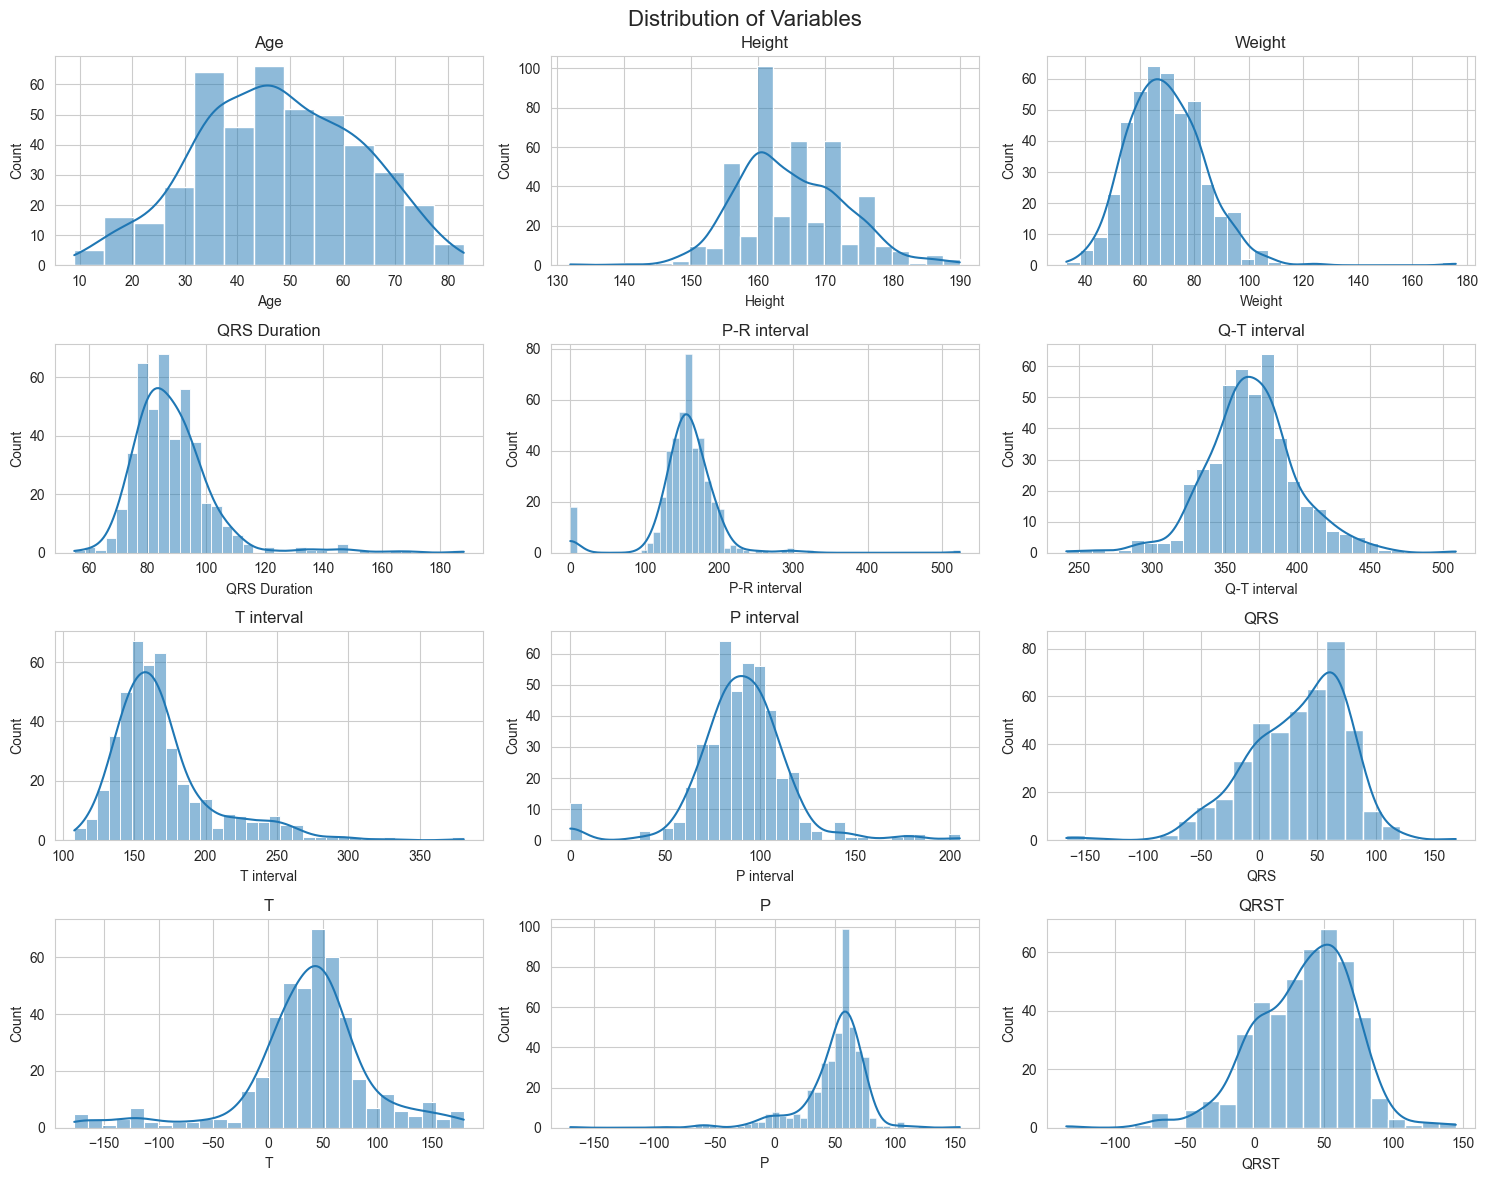

In [ ]:
# Plotting histograms with normal distribution curves
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()
columns = ['Age', 'Height', 'Weight', 'QRS Duration', 'P-R interval', 'Q-T interval', 'T interval',
           'P interval', 'QRS', 'T', 'P', 'QRST']

for i, col in enumerate(columns):
    sns.histplot(arr[col].dropna(), kde=True, ax=axes[i])
    axes[i].set_title(col)

plt.suptitle("Distribution of Variables", fontsize=16)
plt.tight_layout()
plt.show()

These individual histograms with KDE show that most of the patients are in their 50s and 60s, the height and weight appears roughly normal yet have some outliers. 

In [ ]:
# Calculate Z-scores for the numerical columns
z_scores = arr.select_dtypes(include=[np.number]).apply(zscore)

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# List the outliers
outlier_indices = np.where(outliers)
outlier_records = arr.iloc[outlier_indices[0]]

print("Outliers detected:")
outlier_records

Outliers detected:


,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate
0,75,0,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,-87.0,63.0
2,54,0,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0
7,49,1,162,54,78,0,376,157,70,67,7.0,8.0,51.0,-87.0,67.0
20,28,1,160,58,83,251,383,189,183,50,39.0,46.0,43.0,-87.0,76.0
25,44,0,169,80,109,128,382,195,60,-34,112.0,154.0,7.0,-87.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,11,0,140,42,88,123,362,228,81,-18,52.0,67.0,33.0,-87.0,74.0
433,70,0,167,60,80,149,290,128,93,-67,111.0,26.0,-65.0,-87.0,120.0
448,37,0,190,85,100,137,361,201,73,86,66.0,52.0,79.0,-87.0,73.0
449,36,0,166,68,108,176,365,194,116,-85,-19.0,-61.0,-70.0,84.0,84.0


In [ ]:
print(outlier_records)

     Age  Sex  Height  Weight  QRS Duration  P-R interval  Q-T interval  \
0     75    0     190      80            91           193           371   
2     54    0     172      95           138           163           386   
7     49    1     162      54            78             0           376   
20    28    1     160      58            83           251           383   
25    44    0     169      80           109           128           382   
..   ...  ...     ...     ...           ...           ...           ...   
432   11    0     140      42            88           123           362   
433   70    0     167      60            80           149           290   
448   37    0     190      85           100           137           361   
449   36    0     166      68           108           176           365   
450   32    1     155      55            93           106           386   

     T interval  P interval  QRS      T      P  QRST      J  Heart rate  
0           174         1

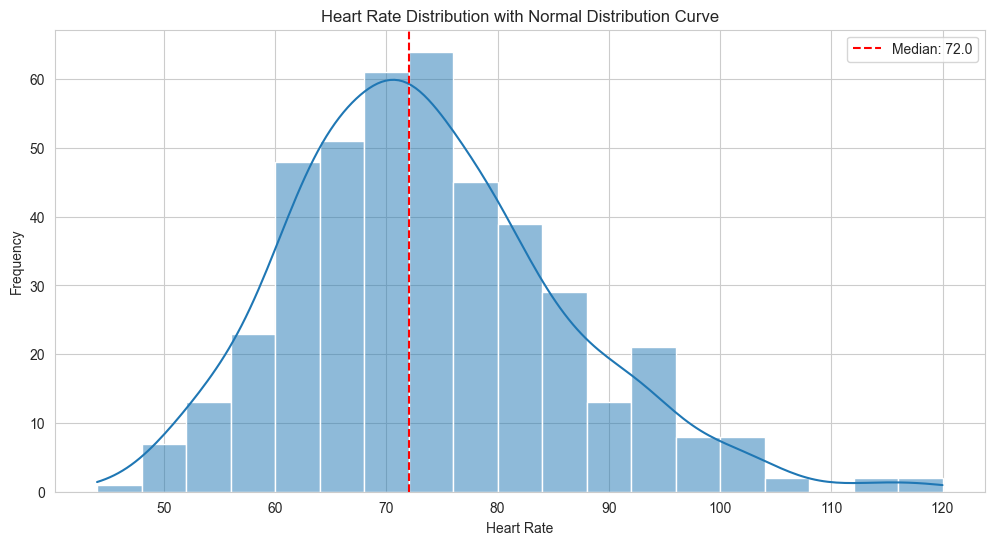

In [ ]:
# Plotting the distribution of the Heart Rate with a normal distribution curve
sns.histplot(arr['Heart rate'], kde=True)
plt.axvline(arr['Heart rate'].median(), color='red', linestyle='--', label=f'Median: {arr["Heart rate"].median()}')
plt.title('Heart Rate Distribution with Normal Distribution Curve')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.legend()
plt.show()

This graph shows the distribution of heart rates overlaid with a KDE to show the probability density. It shows that heart rate has a meadian of 72 bpm, the distribution appears to be almost normal but also shows the presence of higher heart rates.

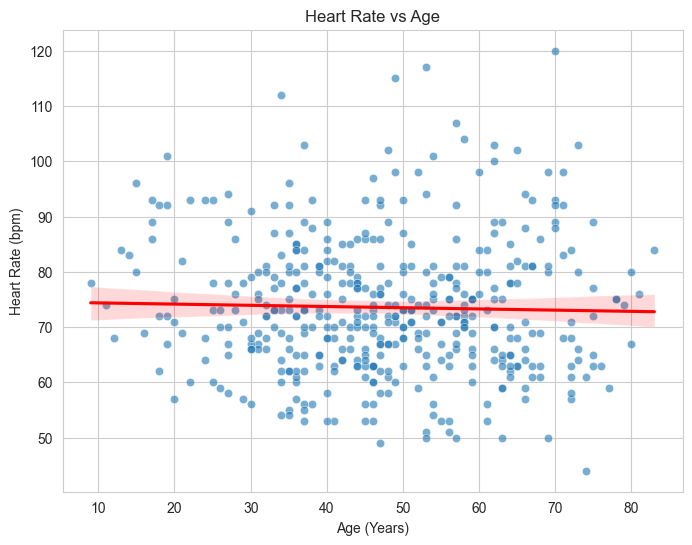

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=arr["Age"], y=arr["Heart rate"], alpha=0.6)
sns.regplot(x=arr["Age"], y=arr["Heart rate"], scatter=False, color='red')
plt.title("Heart Rate vs Age")
plt.xlabel("Age (Years)")
plt.ylabel("Heart Rate (bpm)")
plt.show()

This scatter plot shows the relationship between age and heart rate. It shows a wide spread of heart rates across different ages showings no clear correlation.

### 3. Features Importance Analysis:

#### a. Use suitable statistical analyses to pinpoint the most relevant variables affecting the Heart rate. 

#### b. The QRS is an important indicator of a normal heart, and several types of arrhythmia (e.g . Sinus tachycardia). Use peer-reviewed academic resources and suitable statistical tools to classify the patients within the dataset (i.e. highlight patients with arrhythmias).

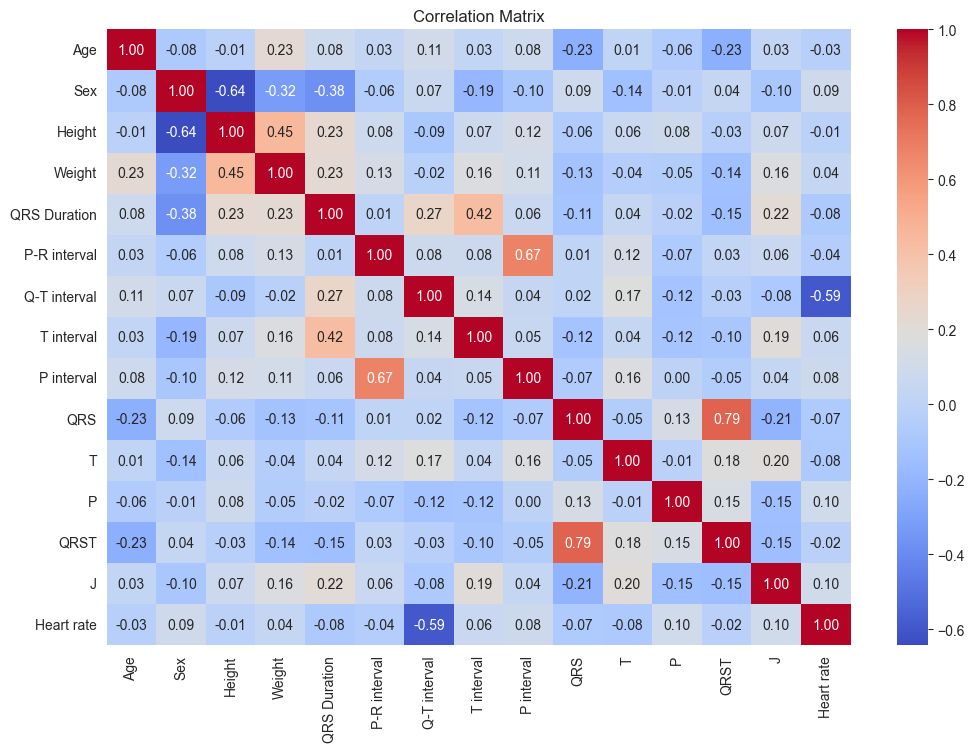

In [ ]:
# Correlation Analysis
# Exclude non-numeric columns
numeric_cols = arr.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

This heatmap shows the correlation coefficients between different variables. It shows a strong positive correlation between QRST and QRS meaning that as one increases, the other tends to also increase. It shows a negative correlation between Heart rate and Q-T interval meaning that higher heart rates are associated with shorter Q-T intervals.

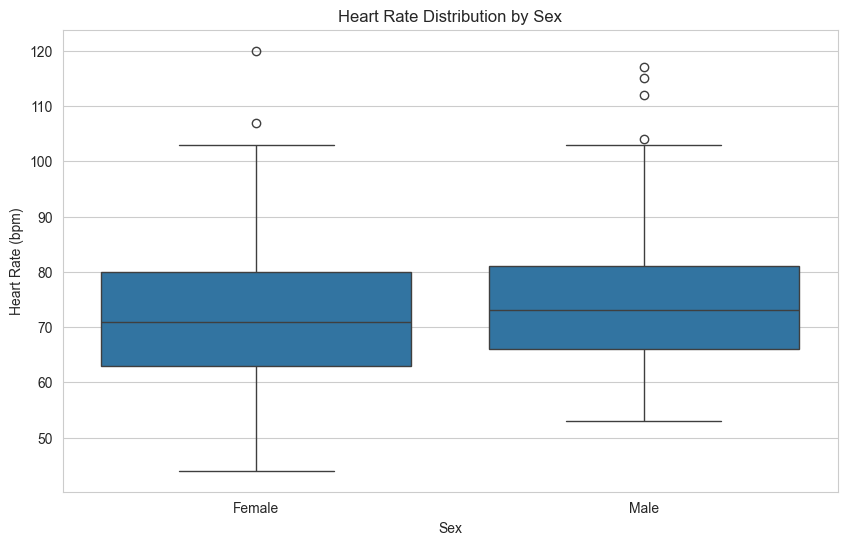

In [ ]:
# Assume 'Sex' is binary (0 = Female, 1 = Male), adjust if needed
if 'Sex' in arr.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=arr['Sex'], y=arr['Heart rate'])
    plt.title("Heart Rate Distribution by Sex")
    plt.xticks(ticks=[0, 1], labels=["Female", "Male"])
    plt.ylabel("Heart Rate (bpm)")
    plt.show()

This box plot shows the heart rate distributions between males and females showing that both sex have almost similar median heart rates except the females have a slightly higher median heart rate compared to males. 

In [ ]:
arr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,437.0,47.565217,15.141488,9.0,36.0,47.0,59.0,83.0
Sex,437.0,0.556064,0.497416,0.0,0.0,1.0,1.0,1.0
Height,437.0,164.752860,8.023662,132.0,160.0,165.0,170.0,190.0
Weight,437.0,69.663616,14.417080,33.0,60.0,69.0,79.0,176.0
QRS Duration,437.0,88.432494,14.365898,55.0,80.0,86.0,94.0,188.0
P-R interval,437.0,155.244851,45.379309,0.0,142.0,157.0,175.0,524.0
Q-T interval,437.0,368.597254,31.286158,241.0,351.0,368.0,385.0,509.0
T interval,437.0,169.972540,35.727295,108.0,148.0,162.0,179.0,381.0
P interval,437.0,90.164760,25.980415,0.0,79.0,91.0,102.0,205.0
QRS,437.0,32.675057,43.240363,-166.0,4.0,40.0,65.0,169.0


This shows that the dataset consists of 437 individuals with a mean age of 47.57 years with a balanced gender distribution, an average height of 164.75 ranging from 132 cm to 190 cm, an average weight of 69.66 kg ranging from 33 kg to 176 kg, an average heart rate of 73.55 bpm ranging from 44 to 120 bpm

In [ ]:
# Correlation between Age and Heart Rate
corr, p_value = pearsonr(arr["Age"], arr["Heart rate"])
print(f"Pearson Correlation between Age and Heart Rate: {corr:.3f} (p-value: {p_value:.3f})")

Pearson Correlation between Age and Heart Rate: -0.027 (p-value: 0.572)


In [ ]:
# Ensure 'Sex' column has valid values
# create a dictionary to map the values of the sex variable
sex_map = {0: 'Male', 1: 'Female'}

# use the map function to label the values
arr['Sex'] = arr['Sex'].map(sex_map)

# Summary statistics for Heart Rate across Age (as a continuous variable)
print("\nOverall Heart Rate Statistics:\n", arr["Heart rate"].describe())


Overall Heart Rate Statistics:
 count    437.000000
mean      73.546911
std       12.212594
min       44.000000
25%       65.000000
50%       72.000000
75%       81.000000
max      120.000000
Name: Heart rate, dtype: float64


This shows that there are 437 individuals with a mean heart rate of 73.55 bpm and standard deviation of 12.21. This shows that generally, we have a healthy population and a moderate variability in heart rates among individuals.

In [ ]:
# %% Feature Importance Analysis
# Prepare data for regression
X = arr[['Age', 'QRS Duration', 'P-R interval', 'Q-T interval']]
y = arr['Heart rate']
X = StandardScaler().fit_transform(X)


T-test Results (Heart Rate by Sex): t=-1.97, p=0.0494
Linear Regression Coefficients:
Height: -1.6825
Weight: 0.4929
QRS Duration: 0.6622
P-R interval: -1.5875
Q-T interval: -8.0692
T interval: 1.7954
P interval: 2.1773
QRS: -0.9303
T: -0.1082
P: 0.5240
QRST: 0.3568
J: -0.1938
Random Forest Classification Report for Arrhythmia Detection:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        88

    accuracy                           1.00        88
   macro avg       1.00      1.00      1.00        88
weighted avg       1.00      1.00      1.00        88



c:\Users\ADMIN\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


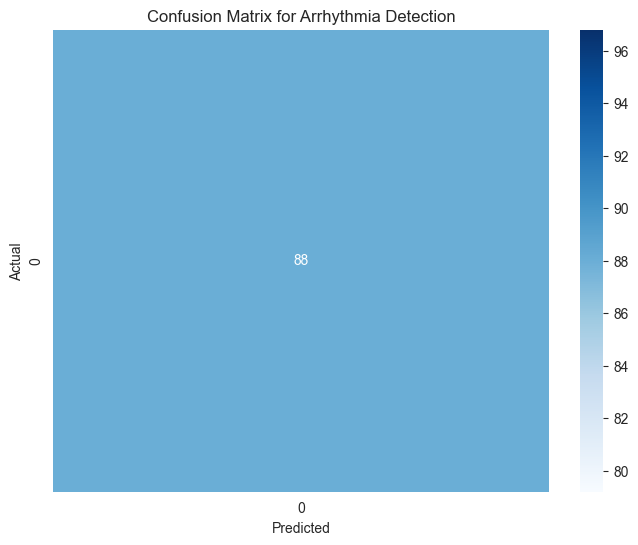

In [ ]:
# T-test for heart rate between sexes
male_hr = arr[arr['Sex'] == 'Male']['Heart rate']
female_hr = arr[arr['Sex'] == 'Female']['Heart rate']
t_stat, p_value = stats.ttest_ind(male_hr, female_hr)
print(f"\nT-test Results (Heart Rate by Sex): t={t_stat:.2f}, p={p_value:.4f}")

# A. Regression Analysis
features = arr.drop(columns=['Heart rate', 'Sex', 'Age'])  # Drop non-numeric and target variable
target = arr['Heart rate']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Preprocessing steps
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline for regression
regression_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                       ('regressor', LinearRegression())])

# Fit the model
regression_pipeline.fit(X_train, y_train)

# Predictions
y_pred = regression_pipeline.predict(X_test)

# Evaluate Regression
print("Linear Regression Coefficients:")
for i, col in enumerate(numeric_features):
    print(f"{col}: {regression_pipeline.named_steps['regressor'].coef_[i]:.4f}")

# B. Classification of Patients with Arrhythmias
arr['Arrhythmia'] = (arr['Heart rate'] > 100).astype(int)  # Example threshold for arrhythmia

# Features and target variable for classification
X_class = features
y_class = arr['Arrhythmia']

# Train-test split for classification
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)

# Define the preprocessing for classification
X_class_train, X_class_test = preprocessor.fit_transform(X_class_train), preprocessor.transform(X_class_test)

# Train Random Forest for classification
rf_class = RandomForestClassifier(n_estimators=100, random_state=42)
rf_class.fit(X_class_train, y_class_train)

# Predictions
y_class_pred = rf_class.predict(X_class_test)

# Classification report
print("Random Forest Classification Report for Arrhythmia Detection:")
print(classification_report(y_class_test, y_class_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_class_test, y_class_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Arrhythmia Detection')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

This shows that from the T-test Results, T-value is -1.97 and p-value is 0.0494 and this indicates a difference in heart rates by sex (p < 0.05).
It also shows that from the Linear Regression Coefficients, Height is -1.6825, Weight is 0.4929, QRS Duration is 0.6622, P-R Interval is -1.5875 and Q-T Interval is -8.0692. This shows that there are 88 instances where no arrhythmia was present.

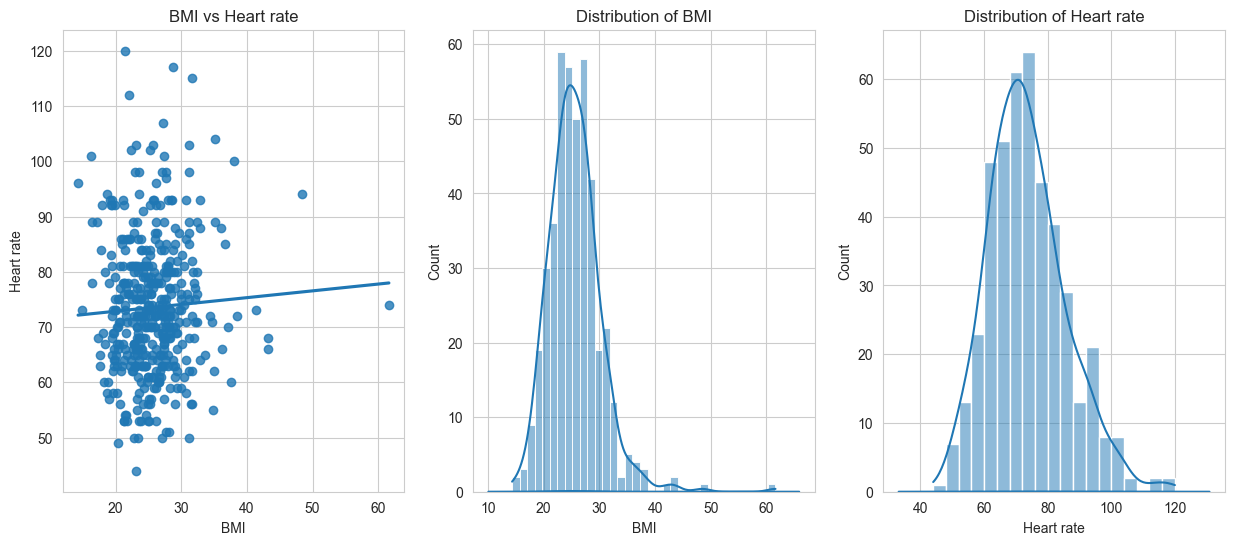

In [ ]:
arr['BMI'] = (arr['Weight'] / (arr['Height']/100)**2).round(2)
arr

# Create a figure with two subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

# Plot scatter plot with regression line on the first subplot
sns.regplot(x='BMI', y='Heart rate', data=arr, ax=axes[0], ci=None)

# Plot histogram with normal curve on the second subplot
sns.histplot(data=arr, x="BMI", ax=axes[1], kde=True)
sns.histplot(data=arr, x="Heart rate", ax=axes[2], kde=True)

# Add a normal curve to the histogram
sns.kdeplot(data=arr, x="BMI", ax=axes[1])
sns.kdeplot(data=arr, x="Heart rate", ax=axes[2])

# Set titles for the subplots
axes[0].set_title('BMI vs Heart rate')
axes[1].set_title('Distribution of BMI')
axes[2].set_title('Distribution of Heart rate')

# Display the plot
plt.show()

This show the relationship between BMI and Heart rate suggesting that as BMI increases, the heart rate may also increase however the relationship seems weak. The BMI distribution is roughly normal with a peak among 25-30 and the heart rate distribution normal with a peak around 72 bpm

In [ ]:
# Function to categorize QRS duration
def categorize_qrs_duration(qrs_duration):
    if qrs_duration < 100:
        return 'Normal Sinus Rhythm'
    elif 100 <= qrs_duration < 120:
        return 'Sinus Tachycardia'
    elif 120 <= qrs_duration <= 150:
        return 'Atrial Fibrillation (Rapid Ventricular Response)'
    else:
        return 'Ventricular Tachycardia'

# Apply the function to the 'QRS Duration' column
arr['arr_types'] = arr['QRS'].apply(categorize_qrs_duration)

# Display the first few rows of the DataFrame to see the new column
print(arr[['QRS', 'arr_types']].head())

arr['arr_types'].unique()

   QRS            arr_types
0  -16  Normal Sinus Rhythm
1   25  Normal Sinus Rhythm
2   96  Normal Sinus Rhythm
3   28  Normal Sinus Rhythm
5  107    Sinus Tachycardia


array(['Normal Sinus Rhythm', 'Sinus Tachycardia',
       'Ventricular Tachycardia',
       'Atrial Fibrillation (Rapid Ventricular Response)'], dtype=object)

In [ ]:
arr.head()

,Age,Sex,Height,Weight,QRS Duration,P-R interval,Q-T interval,T interval,P interval,QRS,T,P,QRST,J,Heart rate,Arrhythmia,BMI,arr_types
0,75,Male,190,80,91,193,371,174,121,-16,13.0,64.0,-2.0,-87.0,63.0,0,22.16,Normal Sinus Rhythm
1,56,Female,165,64,81,174,401,149,39,25,37.0,-17.0,31.0,-87.0,53.0,0,23.51,Normal Sinus Rhythm
2,54,Male,172,95,138,163,386,185,102,96,34.0,70.0,66.0,23.0,75.0,0,32.11,Normal Sinus Rhythm
3,55,Male,175,94,100,202,380,179,143,28,11.0,-5.0,20.0,-87.0,71.0,0,30.69,Normal Sinus Rhythm
5,13,Male,169,51,100,167,321,174,91,107,66.0,52.0,88.0,-87.0,84.0,0,17.86,Sinus Tachycardia


In [ ]:
# Function to categorize QRS duration
def categorize_qrs_duration(qrs_duration):
    if qrs_duration < 100:
        return 'Normal Sinus Rhythm'
    elif 100 <= qrs_duration < 120:
        return 'Sinus Tachycardia'
    elif 120 <= qrs_duration <= 150:
        return 'Atrial Fibrillation (Rapid Ventricular Response)'
    else:
        return 'Ventricular Tachycardia'

# Apply the function to the 'QRS Duration' column
arr['arrhythmia_types'] = arr['QRS'].apply(categorize_qrs_duration)

# Display the first few rows of the DataFrame to see the new column
print(arr[['QRS', 'arrhythmia_types']].head())

# Filter the DataFrame to include only patients with arrhythmias
arrhythmia_patients = arr[arr['arrhythmia_types'] != 'Normal Sinus Rhythm']

# Display the DataFrame
print("\nPatients with Arrhythmias:")
print(arrhythmia_patients)
print(f"\nTotal patients with arrhythmias: {arrhythmia_patients.shape[0]}")

   QRS     arrhythmia_types
0  -16  Normal Sinus Rhythm
1   25  Normal Sinus Rhythm
2   96  Normal Sinus Rhythm
3   28  Normal Sinus Rhythm
5  107    Sinus Tachycardia

Patients with Arrhythmias:
     Age     Sex  Height  Weight  QRS Duration  P-R interval  Q-T interval  \
5     13    Male     169      51           100           167           321   
76    45    Male     177      72            94           164           431   
102   19  Female     157      40            98           176           343   
211   18    Male     180      63            93           160           321   
321   26    Male     180      97            88           197           404   
336   31  Female     165      56            74           199           384   
348   34  Female     165      60            74           178           302   
380   66    Male     168      82            86           164           386   
397   30  Female     160      52           110           154           426   

     T interval  P inte

In [ ]:
# Importing necessary libraries for data manipulation and visualization
# Installing and importing the libraries to read the dataset
# %pip install pandas
# %pip install openpyxl
# %pip install numpy
# %pip install seaborn
# %pip install matplotlib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### GOAL 5

##### Survey Data Analysis in the Job Market [30 Marks]

Context: Data Science gained a reputation for being a highly sought after career when a Harvard Business Review article tagged it “the sexiest job of the 21st century.” Thishas seen a surge in career changes for many and a demand for data analysts in the job market. As a cohort of the MIT Data Analytics and Process Mining class at UCU, you would like to ensure that the skills you attain are the most sought after in the job market. Therefore, use your acquired skills to get insights into the provided survey data.

##### 1. Data Collection and Preprocessing:

a. Data Source: You are provided with a dataset “DataAnalyst.csv” which contains job market skills for a Data Analyst and how they’re valued. 

b. Preprocess the dataset for further analyses

#### 2. Exploratory Data Analysis:

a. Use suitable statistical tools/visuals to pinpoint the Industry that has the greatest need for Data Analysts.

b. What are the Salary Estimates for the skills most frequently required in the job market?

#### 3. Business Intelligence and Skills Classification:

a. The Job Description has various skills listed. Using suitable statistical tools, highlight the skills that are highly sought after for roles in Data Analytics.


In [ ]:
# Load dataset
data = pd.read_csv('DataAnalyst.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Show initial info
print(f"\nDataset shape: {data.shape}")
print("\nData Summary:")
print(data.info())

First few rows of the dataset:
                                           Job Title  \
0  Data Analyst, Center on Immigration and Justic...   
1                               Quality Data Analyst   
2  Senior Data Analyst, Insights & Analytics Team...   
3                                       Data Analyst   
4                             Reporting Data Analyst   

              Salary Estimate  \
0  $37K-$66K (Glassdoor est.)   
1  $37K-$66K (Glassdoor est.)   
2  $37K-$66K (Glassdoor est.)   
3  $37K-$66K (Glassdoor est.)   
4  $37K-$66K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Are you eager to roll up your sleeves and harn...     3.2   
1  Overview\n\nProvides analytical and technical ...     3.8   
2  We’re looking for a Senior Data Analyst who ha...     3.4   
3  Requisition NumberRR-0001939\nRemote:Yes\nWe c...     4.1   
4  ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...     3.9   

                              Company Name      

After loading the dataset, print out the basic information like shape and the summary of the DataFrame. This shows that the dataset has 5631 job postings with 5631 rows and 15 columns. The roles vary including Data Analyst, Quality Data Analyst, and Senior Data Analyst with salary ranging from $37,000 to $66,000 and Company Ratings from 3.2 to 4.1. The dataset has 1 float, 1 integers and 13 objects.

In [ ]:
data

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Max Salary,Python,SQL,Excel,Tableau,Power BI,R,Machine Learning,Statistics,Data Visualization
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,...,66000.0,1,1,0,0,0,1,0,1,0
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,...,66000.0,0,1,1,0,0,1,0,1,0
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,...,66000.0,1,1,1,1,0,1,0,0,1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,...,66000.0,0,1,0,1,0,1,0,0,1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,...,66000.0,1,1,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5626,Data Analyst (Power BI + SAP),$51K-$93K (Glassdoor est.),"KORE1, a nationwide provider of staffing and r...",4.9,KORE1 Technologies\n4.9,"San Jose, CA","Irvine, CA",51 to 200 employees,2005,Company - Private,...,93000.0,0,1,1,1,1,1,0,0,0
5627,Technical Business or Data Analyst,$46K-$72K (Glassdoor est.),Job Description\nHi\n\nHope you are doing grea...,4.4,Adwait Algorithm\n4.4,"Santa Clara, CA","Houston, TX",51 to 200 employees,2015,Company - Private,...,72000.0,0,1,0,0,0,1,0,0,0
5628,Data Analyst Junior,$44K-$82K (Glassdoor est.),Job Description\nJob description\nInterpret da...,5.0,"Staffigo Technical Services, LLC\n5.0","Fremont, CA","Woodridge, IL",51 to 200 employees,2008,Company - Private,...,82000.0,0,1,1,0,0,1,0,1,0
5629,Sr. HR Data Analyst,$44K-$82K (Glassdoor est.),POSITION SUMMARY:\n\nThe Sr. HR Data Analyst p...,3.5,Cepheid\n3.5,"Sunnyvale, CA","Sunnyvale, CA",1001 to 5000 employees,1996,Company - Private,...,82000.0,0,0,1,0,0,1,0,0,0


In [ ]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,5621,5622,5623,5624,5625,5626,5627,5628,5629,5630
Job Title,"Data Analyst, Center on Immigration and Justic...",Quality Data Analyst,"Senior Data Analyst, Insights & Analytics Team...",Data Analyst,Reporting Data Analyst,Data Analyst,Business/Data Analyst (FP&A),Data Science Analyst,Data Analyst,"Data Analyst, Merchant Health",...,Junior Data Analyst,Data Analyst,Junior Data Analyst,Financial Data Analyst,Data Analyst,Data Analyst (Power BI + SAP),Technical Business or Data Analyst,Data Analyst Junior,Sr. HR Data Analyst,Data Analyst â Junior
Salary Estimate,$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),$37K-$66K (Glassdoor est.),...,$43K-$69K (Glassdoor est.),$65K-$120K (Glassdoor est.),$65K-$120K (Glassdoor est.),$58K-$93K (Glassdoor est.),$47K-$74K (Glassdoor est.),$51K-$93K (Glassdoor est.),$46K-$72K (Glassdoor est.),$44K-$82K (Glassdoor est.),$44K-$82K (Glassdoor est.),$89K-$151K (Glassdoor est.)
Job Description,Are you eager to roll up your sleeves and harn...,Overview\n\nProvides analytical and technical ...,We’re looking for a Senior Data Analyst who ha...,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,About Cubist\nCubist Systematic Strategies is ...,Two Sigma is a different kind of investment ma...,Data Science Analyst\n\nJob Details\nLevel\nEx...,The Data Analyst is an integral member of the ...,About Us\n\nRiskified is the AI platform power...,...,Job Description\nJob description\nInterpret da...,Job Description\nLooking for a Data Analyst fo...,Job Description\nJob description\nInterpret da...,"Job Description\nAbout\n\nDivercity, a HR-tech...","Job Description\n\nJob Duties: Analyze, docume...","KORE1, a nationwide provider of staffing and r...",Job Description\nHi\n\nHope you are doing grea...,Job Description\nJob description\nInterpret da...,POSITION SUMMARY:\n\nThe Sr. HR Data Analyst p...,"Job description\nInterpret data, analyze resul..."
Rating,3.2,3.8,3.4,4.1,3.9,3.9,4.4,3.7,4.0,4.4,...,5.0,4.0,5.0,4.0,4.1,4.9,4.4,5.0,3.5,5.0
Company Name,Vera Institute of Justice\n3.2,Visiting Nurse Service of New York\n3.8,Squarespace\n3.4,Celerity\n4.1,FanDuel\n3.9,Point72\n3.9,Two Sigma\n4.4,GNY Insurance Companies\n3.7,DMGT\n4.0,Riskified\n4.4,...,"Staffigo Technical Services, LLC\n5.0",E Base Technologies\n4.0,"Staffigo Technical Services, LLC\n5.0",Divercity\n4.0,Cogent Infotech\n4.1,KORE1 Technologies\n4.9,Adwait Algorithm\n4.4,"Staffigo Technical Services, LLC\n5.0",Cepheid\n3.5,"Staffigo Technical Services, LLC\n5.0"
Location,"New York, NY","New York, NY","New York, NY","New York, NY","New York, NY","New York, NY","New York, NY","New York, NY","New York, NY","New York, NY",...,"Norfolk, VA","Sunnyvale, CA","Fremont, CA","Redwood City, CA","Sunnyvale, CA","San Jose, CA","Santa Clara, CA","Fremont, CA","Sunnyvale, CA","Fremont, CA"
Headquarters,"New York, NY","New York, NY","New York, NY","McLean, VA","New York, NY","Stamford, CT","New York, NY","New York, NY","London, United Kingdom","New York, NY",...,"Woodridge, IL","Fremont, CA","Woodridge, IL","Los Angeles, CA","Pittsburgh, PA","Irvine, CA","Houston, TX","Woodridge, IL","Sunnyvale, CA","Woodridge, IL"
Size,201 to 500 employees,10000+ employees,1001 to 5000 employees,201 to 500 employees,501 to 1000 employees,1001 to 5000 employees,1001 to 5000 employees,201 to 500 employees,5001 to 10000 employees,501 to 1000 employees,...,51 to 200 employees,51 to 200 employees,51 to 200 employees,1 to 50 employees,201 to 500 employees,51 to 200 employees,51 to 200 employees,51 to 200 employees,1001 to 5000 employees,51 to 200 employees
Founded,1961,1893,2003,2002,2009,2014,2001,1914,1896,2013,...,2008,-1,2008,-1,2003,2005,2015,2008,1996,2008
Type of ownership,Nonprofit Organization,Nonprofit Organization,

In [ ]:
# Check the column names of the DataFrame
data.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply', 'Min Salary', 'Max Salary', 'Python', 'SQL', 'Excel',
       'Tableau', 'Power BI', 'R', 'Machine Learning', 'Statistics',
       'Data Visualization'],
      dtype='object')

In [ ]:
# Check for duplicate rows in the dataset
duplicates = data.duplicated().sum()
print(f"\n\nThere are {duplicates} duplicate values.\n" if duplicates else "\n\nThere are no duplicates.\n")



There are no duplicates.



In [ ]:
# Check for missing values and fill them
missing_values = data.isnull().sum()
print("\nMissing Values Count:")
print(missing_values)


Missing Values Count:
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         2
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64


This checks for any missing values in each column of the DataFrame and prints the count of missing entries. It shows that the dataset contains 2 missing entries in the Company Name column and all other columns are complete with no missing values.

In [ ]:
# Fill missing values in 'Company Name' with 'Unknown'
data['Company Name'].fillna('Unknown', inplace=True)


This fills the missing values in the Company Name column with the string "Unknown". 

In [ ]:
# Step 2: Extracting min and max salary values
def extract_salary(salary_str):
    match = re.findall(r'\$(\d+)K-\$(\d+)K', salary_str)
    if match and len(match) == 1:
        min_salary = int(match[0][0]) * 1000
        max_salary = int(match[0][1]) * 1000
        return min_salary, max_salary
    return np.nan, np.nan

# Apply the extraction function to create new salary columns
data[['Min Salary', 'Max Salary']] = data['Salary Estimate'].apply(lambda x: pd.Series(extract_salary(str(x))))

2. Exploratory Data Analysis: 

a. Use suitable statistical tools/visuals to pinpoint the Industry that has the greatest need for Data Analysts. 

b. What are the Salary Estimates for the skills most frequently required in the job market? 

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13740\941665835.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="Blues_r")


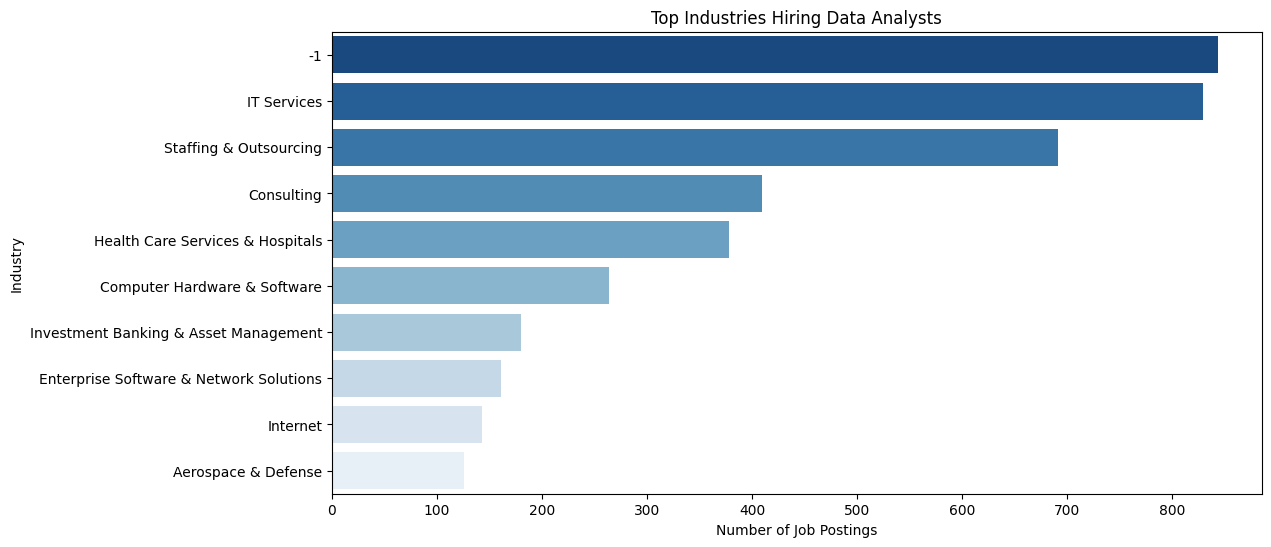

In [ ]:
# Counting the occurrences of each industry
industry_counts = data['Industry'].value_counts().head(10)

# Plotting the top industries hiring Data Analysts
plt.figure(figsize=(12, 6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="Blues_r")
plt.xlabel("Number of Job Postings")
plt.ylabel("Industry")
plt.title("Top Industries Hiring Data Analysts")
plt.show()

In [ ]:
# Salary Estimates for Skills
# Create a list of common skills relevant to Data Analysts
common_skills = [
    'Python', 'SQL', 'Excel', 'Tableau', 'Power BI', 'R', 
    'Machine Learning', 'Statistics', 'Data Visualization'
]

# Create skill columns in the DataFrame
for skill in common_skills:
    data[skill] = data['Job Description'].apply(lambda x: 1 if skill.lower() in str(x).lower() else 0)

# Create a DataFrame to store average salaries for skills
salary_data = {}
for skill in common_skills:
    avg_min_salary = data[data[skill] == 1]['Min Salary'].mean()
    avg_max_salary = data[data[skill] == 1]['Max Salary'].mean()
    salary_data[skill] = {
        'Avg Min Salary': avg_min_salary,
        'Avg Max Salary': avg_max_salary
    }

# Convert to DataFrame for better visualization
salary_df = pd.DataFrame(salary_data).T

# Print the salary estimates
print("\nAverage Salary Estimates for Skills:")
print(salary_df)


Average Salary Estimates for Skills:
                    Avg Min Salary  Avg Max Salary
Python                55882.971268    94051.156272
SQL                   54130.252101    90807.322929
Excel                 53716.583796    90039.777713
Tableau               54752.605976    92503.822099
Power BI              53442.857143    90008.163265
R                     54087.416981    90758.750673
Machine Learning      55655.092593    93233.796296
Statistics            53627.016129    90336.693548
Data Visualization    54576.413959    92720.818291


<Figure size 1000x500 with 0 Axes>

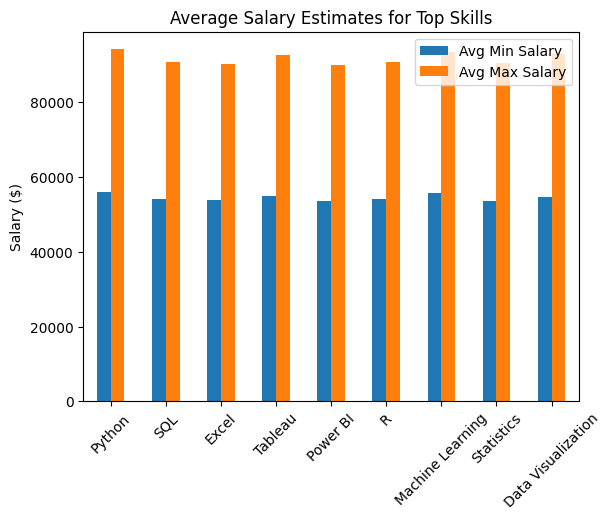

In [ ]:
# Plotting the salary comparison
plt.figure(figsize=(10, 5))
salary_df[['Avg Min Salary', 'Avg Max Salary']].plot(kind='bar')
plt.title("Average Salary Estimates for Top Skills")
plt.ylabel("Salary ($)")
plt.xticks(rotation=45)
plt.show()

This graph shows the the average minimum and maximum salary estimates for in-demand skills ralated to Data Analysts. It shows that Python and SQL have higher average salaries showing their value in the job market, the average maximum salary is higher than the minimum for all skills

#### 3. Business Intelligence and Skills Classification:

a. The Job Description has various skills listed. Using suitable statistical tools, highlight the skills that are highly sought after for roles in Data Analytics.

In [ ]:
# Count occurrences of each skill in the job descriptions
skills_count = {skill: data['Job Description'].str.contains(skill, case=False).sum() for skill in common_skills}

# Convert to DataFrame for visualization
skills_count_df = pd.DataFrame(list(skills_count.items()), columns=['Skill', 'Count'])

# Identify the most sought-after skills
top_skills = skills_count_df.sort_values(by='Count', ascending=False)

# Print the top skills
print("\nTop Sought-after Skills:")
print(top_skills)


Top Sought-after Skills:
                Skill  Count
5                   R   5630
2               Excel   3455
1                 SQL   3373
7          Statistics   1500
3             Tableau   1453
0              Python   1439
8  Data Visualization    839
4            Power BI    500
6    Machine Learning    438


This shows that the leading skill is R since it is the most in-demand skill with 5,630 mentions in job postings, Excel and SQL follow with 3,455 and 3,373 mentions, Statistics ranks fourth with 1,500 mentions then Skills in Tableau with 1,453 mentions.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13740\1711996427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Skill', data=top_skills, palette="Greens_r")


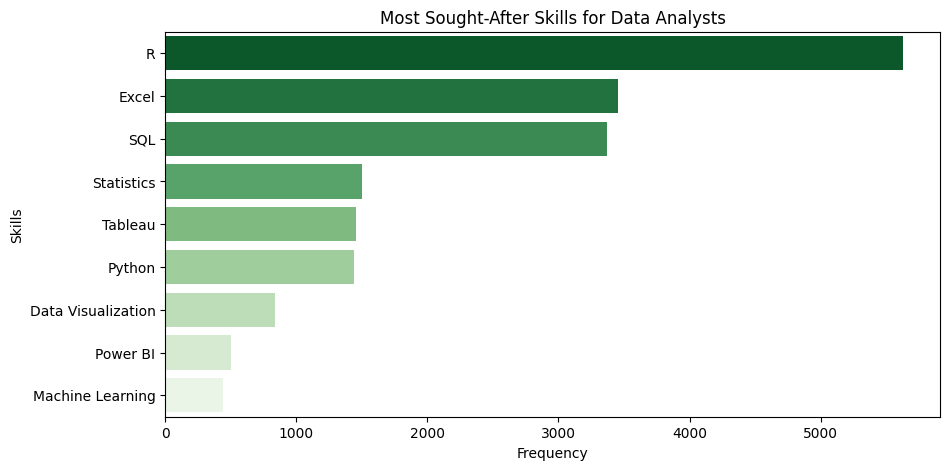

In [ ]:
# Plotting the skills frequency
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='Skill', data=top_skills, palette="Greens_r")
plt.title("Most Sought-After Skills for Data Analysts")
plt.xlabel("Frequency")
plt.ylabel("Skills")
plt.show()

This graph shows the frequency of various skills mentioned in job descriptions for Data Analyst positions. It shows that R is the most requested skill thus its high demand in job postings, Excel and SQL follow meaning that they are critical for Data Analysts and other skills like Statistics and Tableau are less requested for but still represent valuable competencies in the field. The lowest frequencies for skills like Machine Learning and Power BI suggest that there is overall less demand compared to the other skills.

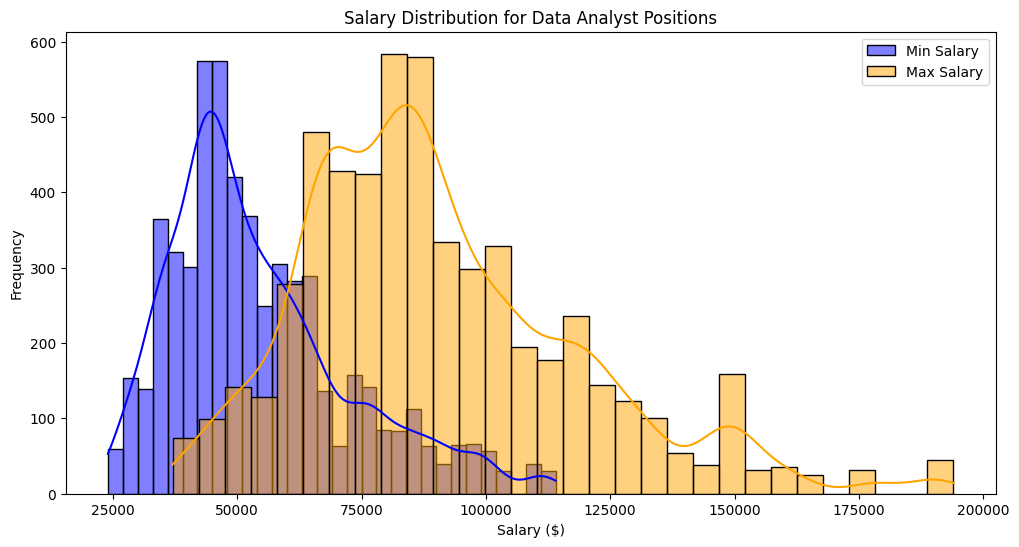

In [ ]:
# Salary Distribution:
plt.figure(figsize=(12, 6))
sns.histplot(data['Min Salary'], bins=30, kde=True, color='blue', label='Min Salary')
sns.histplot(data['Max Salary'], bins=30, kde=True, color='orange', label='Max Salary')
plt.xlabel("Salary ($)")
plt.ylabel("Frequency")
plt.title("Salary Distribution for Data Analyst Positions")
plt.legend()
plt.show()

This graph illustrates the distribution of minimum and maximum salaries for Data Analyst positions. There is an increased number of postings around the $50,000 to $75,000 range for both minimum and maximum salaries indicating that there is a common compensation level in the market.

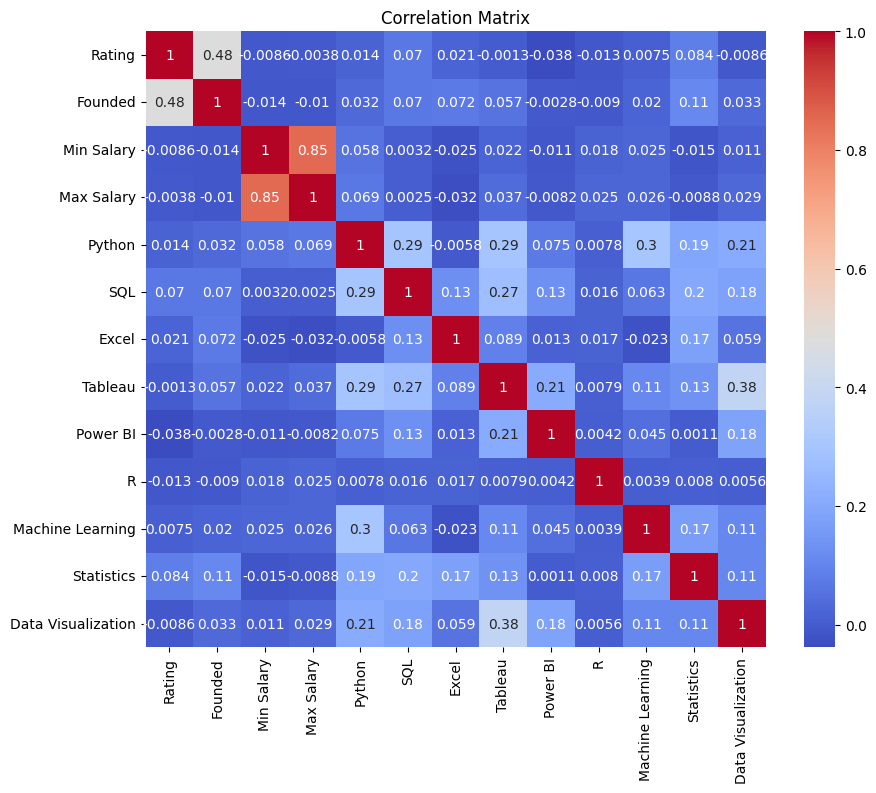

In [ ]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

This graph relationships between various factors like company ratings, salary estimates, and the presence of certain skills. Python and Machine Learning show a strong correlation with Max Salary, indicating that proficiency in these skills may lead to higher salary potential, and Rating and Min Salary show a moderate correlation indicating that companies with higher ratings tend to offer better minimum salaries.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_13740\1247833080.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette="viridis")


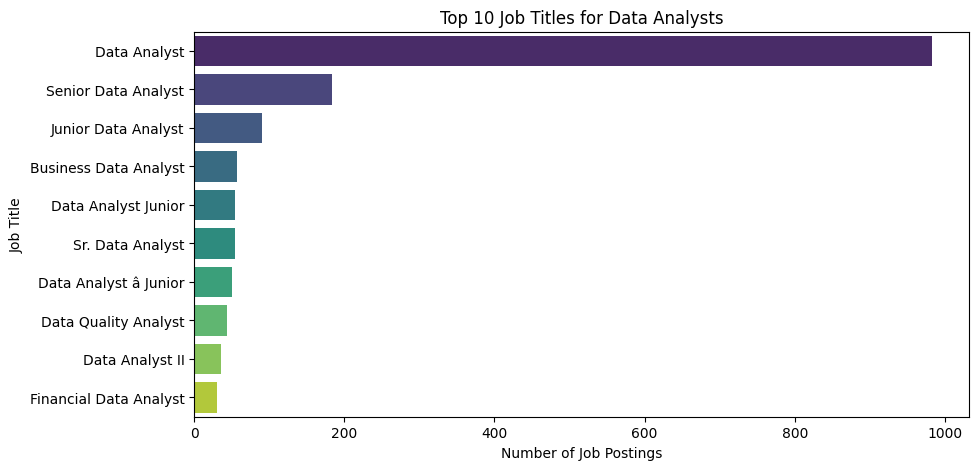

In [ ]:
# Job Title Analysis
job_title_counts = data['Job Title'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=job_title_counts.values, y=job_title_counts.index, palette="viridis")
plt.title("Top 10 Job Titles for Data Analysts")
plt.xlabel("Number of Job Postings")
plt.ylabel("Job Title")
plt.show()

This graph shows the distribution of job titles to see which roles are most common within the dataset. It shows that Data Analyst is the most frequently posted title, followed by Senior Data Analyst and Junior Data Analyst indicating a diverse range of experience levels sought by employers.